# Length of Stay Prediction - Logistic Regression

## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 2. Read train and test data & inspect

### 2.1 Read data

In [2]:
train_data = pd.read_csv('/Users/thainamhoang/Downloads/ASM1/Assignment1/train_data.csv').drop(['ID', 'HealthServiceArea'], axis=1)

train_data.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


### 2.2 Inspect data

In [3]:
train_data.describe()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405
std,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246
min,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000
25%,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000
50%,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000
75%,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000
max,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        59966 non-null  object
 1   Race                          59966 non-null  object
 2   TypeOfAdmission               59966 non-null  object
 3   CCSProcedureCode              59966 non-null  int64 
 4   APRSeverityOfIllnessCode      59966 non-null  int64 
 5   PaymentTypology               59966 non-null  object
 6   BirthWeight                   59966 non-null  int64 
 7   EmergencyDepartmentIndicator  59966 non-null  object
 8   AverageCostInCounty           59966 non-null  int64 
 9   AverageChargesInCounty        59966 non-null  int64 
 10  AverageCostInFacility         59966 non-null  int64 
 11  AverageChargesInFacility      59966 non-null  int64 
 12  AverageIncomeInZipCode        59966 non-null  int64 
 13  LengthOfStay    

In [5]:
train_data.shape

(59966, 14)

## 3. Data preprocessing

### 3.1 Split into X and y

In [6]:
X = train_data.drop('LengthOfStay', axis=1)
y = train_data['LengthOfStay']

### 3.2 Convert LoS to binary targets

In [7]:
y = y.apply(lambda x: 0 if int(x) <= 3 else 1)
y.value_counts()

0    49895
1    10071
Name: LengthOfStay, dtype: int64

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


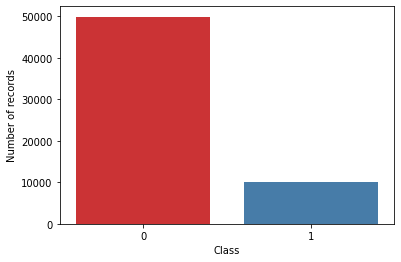

In [51]:
sns.countplot(y, palette='Set1')
plt.xlabel('Class')
plt.ylabel('Number of records')
plt.show()

### 3.4 Deep inspection to remove anomaly data point(s)

In [8]:
for col in X.columns:
    print(X[col].value_counts())
    print('-------------------')

M    30978
F    28987
U        1
Name: Gender, dtype: int64
-------------------
White                     32943
Other Race                18314
Black/African American     8183
Multi-racial                526
Name: Race, dtype: int64
-------------------
Newborn      58741
Emergency      659
Urgent         412
Elective       154
Name: TypeOfAdmission, dtype: int64
-------------------
 228    19886
 115    13628
 0      11189
 220    10773
 231     2981
-1        769
 216      740
Name: CCSProcedureCode, dtype: int64
-------------------
1    47953
2     8760
3     3252
4        1
Name: APRSeverityOfIllnessCode, dtype: int64
-------------------
Medicaid                     28723
Private Health Insurance     15608
Blue Cross/Blue Shield       12073
Self-Pay                      1984
Federal/State/Local/VA         849
Managed Care, Unspecified      545
Miscellaneous/Other            118
Medicare                        44
Unknown                         22
Name: PaymentTypology, dtype: int64


In [9]:
# Drop value U in Gender
drop_index_gender = X.index[X['Gender'] == 'U'].values.tolist()
X = X.drop(drop_index_gender)
y = y.drop(drop_index_gender)
X['Gender'].value_counts()

M    30978
F    28987
Name: Gender, dtype: int64

In [10]:
# Drop value 4 in APRSeverityOfIllnessCode
drop_index_illness = X.index[X['APRSeverityOfIllnessCode'] == 4].values.tolist()
X = X.drop(drop_index_illness)
y = y.drop(drop_index_illness)
X['APRSeverityOfIllnessCode'].value_counts()

1    47953
2     8759
3     3252
Name: APRSeverityOfIllnessCode, dtype: int64

## 4. Encode data with OneHotEncoder

In [11]:
X_copy = X.copy()
encode_col = ['Gender', 
              'Race', 
              'TypeOfAdmission', 
              'CCSProcedureCode',
              'PaymentTypology', 
              'EmergencyDepartmentIndicator']

for col in encode_col:
    dummy = pd.get_dummies(X_copy[col])
    X_copy = pd.concat([X_copy, dummy], axis=1)
    X_copy = X_copy.drop(col, axis=1)

X_copy.head()

,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,F,M,Black/African American,...,Federal/State/Local/VA,"Managed Care, Unspecified",Medicaid,Medicare,Miscellaneous/Other,Private Health Insurance,Self-Pay,Unknown,N,Y
0,1,3700,2611,9227,1751,8951,45,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,2900,3242,8966,3338,6409,34,0,1,1,...,0,0,1,0,0,0,0,0,1,0
2,1,3200,3155,11381,4980,9323,45,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,1,3300,3155,11381,5826,15680,59,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,2600,2611,9227,6000,14344,59,1,0,0,...,0,0,1,0,0,0,0,0,1,0


## 5. Split data into training and testing set

### 5.1 Split dataset

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.3, stratify=y)

In [13]:
X_train

,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,F,M,Black/African American,...,Federal/State/Local/VA,"Managed Care, Unspecified",Medicaid,Medicare,Miscellaneous/Other,Private Health Insurance,Self-Pay,Unknown,N,Y
6518,1,3200,2785,10644,2490,9207,96,1,0,0,...,0,0,0,0,0,1,0,0,1,0
54226,1,3300,1371,5463,1157,4438,47,1,0,0,...,0,0,0,0,0,1,0,0,1,0
54382,3,2900,1371,5463,1157,4438,47,0,1,0,...,0,0,1,0,0,0,0,0,1,0
7660,1,3500,854,1516,854,1516,41,0,1,0,...,0,0,1,0,0,0,0,0,1,0
11807,1,3000,2785,10644,4758,10119,96,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40197,1,3600,3155,11381,3032,10135,74,1,0,0,...,0,0,0,0,0,1,0,0,1,0
46404,1,3600,3242,8966,2249,11623,34,1,0,1,...,0,0,0,0,0,1,0,0,1,0
3752,1,3300,746,1243,631,1272,45,0,1,0,...,0,0,0,0,0,1,0,0,1,0
30635,1,3500,2041,9917,2462,11485,59,0,1,0,...,0,0,1,0,0,0,0,0,1,0


### 5.2 Reset index

In [14]:
def df_reset_index(x):
    return x.reset_index().drop('index', axis = 1)

X_train = df_reset_index(X_train)
X_test = df_reset_index(X_test)
y_train = df_reset_index(y_train)
y_test = df_reset_index(y_test)

In [15]:
X_train

,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,F,M,Black/African American,...,Federal/State/Local/VA,"Managed Care, Unspecified",Medicaid,Medicare,Miscellaneous/Other,Private Health Insurance,Self-Pay,Unknown,N,Y
0,1,3200,2785,10644,2490,9207,96,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,1,3300,1371,5463,1157,4438,47,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,3,2900,1371,5463,1157,4438,47,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,1,3500,854,1516,854,1516,41,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,1,3000,2785,10644,4758,10119,96,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41969,1,3600,3155,11381,3032,10135,74,1,0,0,...,0,0,0,0,0,1,0,0,1,0
41970,1,3600,3242,8966,2249,11623,34,1,0,1,...,0,0,0,0,0,1,0,0,1,0
41971,1,3300,746,1243,631,1272,45,0,1,0,...,0,0,0,0,0,1,0,0,1,0
41972,1,3500,2041,9917,2462,11485,59,0,1,0,...,0,0,1,0,0,0,0,0,1,0


## 6. Scale data

### 6.1 StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_transform = scaler.transform(X_train)
X_test_transform = scaler.transform(X_test)
y_train_ravel = y_train.values.ravel()

## 7. Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=0)
logistic.fit(X_train_transform, y_train_ravel)

LogisticRegression(random_state=0)

In [25]:
from sklearn import metrics 

y_pred_logistic = logistic.predict(X_test_transform)

print('Logistic Regression')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_logistic) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_logistic))

Logistic Regression
Accuracy: 84.02%
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     14969
           1       0.62      0.13      0.21      3021

    accuracy                           0.84     17990
   macro avg       0.73      0.56      0.56     17990
weighted avg       0.81      0.84      0.79     17990



## 8. Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(criterion='entropy', max_depth=None)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [27]:
y_pred_tree = clf.predict(X_test)

print('Decision Tree')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_tree) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_tree))

Decision Tree
Accuracy: 78.67%
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     14969
           1       0.34      0.30      0.32      3021

    accuracy                           0.79     17990
   macro avg       0.60      0.59      0.60     17990
weighted avg       0.77      0.79      0.78     17990



## 9. Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train_ravel)

GaussianNB()

In [33]:
y_pred_naive = gnb.predict(X_test)

print('Naive Bayes')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_naive) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_naive))

Naive Bayes
Accuracy: 81.8%
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     14969
           1       0.44      0.33      0.38      3021

    accuracy                           0.82     17990
   macro avg       0.66      0.63      0.64     17990
weighted avg       0.80      0.82      0.81     17990



## 10. K Means Clustering

In [37]:
data_cluster = X_copy
data_cluster

,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,F,M,Black/African American,...,Federal/State/Local/VA,"Managed Care, Unspecified",Medicaid,Medicare,Miscellaneous/Other,Private Health Insurance,Self-Pay,Unknown,N,Y
0,1,3700,2611,9227,1751,8951,45,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,2900,3242,8966,3338,6409,34,0,1,1,...,0,0,1,0,0,0,0,0,1,0
2,1,3200,3155,11381,4980,9323,45,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,1,3300,3155,11381,5826,15680,59,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,2600,2611,9227,6000,14344,59,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59961,1,3600,1826,4190,1551,3715,36,0,1,1,...,0,0,0,0,0,0,0,0,1,0
59962,2,3300,1826,4190,1551,3715,55,0,1,0,...,0,0,0,0,0,0,0,0,1,0
59963,2,3400,1826,4190,1551,3715,55,0,1,0,...,0,0,0,0,0,0,0,0,1,0
59964,2,3100,1826,4190,1551,3715,55,0,1,0,...,0,0,1,0,0,0,0,0,1,0


### 10.1 StandardScaler

In [38]:
scaler_km = StandardScaler()
data_cluster = scaler_km.fit_transform(data_cluster)
data_cluster

array([[-0.46610779,  0.81500792,  0.37230034, ..., -0.0191578 ,
         0.09289217, -0.09289217],
       [-0.46610779, -0.97777032,  1.35861359, ..., -0.0191578 ,
         0.09289217, -0.09289217],
       [-0.46610779, -0.30547848,  1.22262429, ..., -0.0191578 ,
         0.09289217, -0.09289217],
       ...,
       [ 1.36509759,  0.14271608, -0.85472962, ..., -0.0191578 ,
         0.09289217, -0.09289217],
       [ 1.36509759, -0.52957576, -0.85472962, ..., -0.0191578 ,
         0.09289217, -0.09289217],
       [ 1.36509759,  1.26320247, -0.85472962, ..., -0.0191578 ,
         0.09289217, -0.09289217]])

### 10.2 Fit data into K-Means model

In [43]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data_cluster)

KMeans(n_clusters=2, random_state=0)

In [46]:
output_label = kmeans.labels_
output_label

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [47]:
unique, counts = np.unique(output_label, return_counts=True)
dict(zip(unique, counts))

{0: 513, 1: 59451}

In [50]:
target = y.map({0: 1, 1: 0})

print('K Means Clustering')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(target, output_label) * 100, 2)))
print(metrics.classification_report(target, output_label))

K Means Clustering
Accuracy: 82.45%
              precision    recall  f1-score   support

           0       0.06      0.00      0.01     10069
           1       0.83      0.99      0.90     49895

    accuracy                           0.82     59964
   macro avg       0.44      0.50      0.45     59964
weighted avg       0.70      0.82      0.75     59964

